# SOLVING REAL WORLD DATA SCIENCE TASKS

# Import libraries

In [56]:
import pandas as pd
import os
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

from itertools import combinations
from collections import Counter

# Merging(birleştirme) 12 months of sales data into a single file

In [3]:
df=pd.read_csv("C:/Users/bedir/Downloads/Pandas-Data-Science-Tasks-master/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/Sales_September_2019.csv")

files=[file for file in os.listdir("C:/Users/bedir/Downloads/Pandas-Data-Science-Tasks-master/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data")]

all_months_data=pd.DataFrame()

for file in files:
    df=pd.read_csv("C:/Users/bedir/Downloads/Pandas-Data-Science-Tasks-master/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/"+file) 
    all_months_data=pd.concat([all_months_data,df])
     
all_months_data.to_csv("C:/Users/bedir/Downloads/Pandas-Data-Science-Tasks-master/Pandas-Data-Science-Tasks-master/SalesAnalysis/all_data.csv",index=False)
    

# Read in updated dataframe

In [4]:
all_data=pd.read_csv("C:/Users/bedir/Downloads/Pandas-Data-Science-Tasks-master/Pandas-Data-Science-Tasks-master/SalesAnalysis/all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


# Augment data with additional columns

## Task2:Add Month Column

# Clean up the data

## Drop row of NaN

In [5]:
nan_df=all_data[all_data.isna().any(axis=1)]
nan_df.head()

all_data=all_data.dropna(how="all")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [6]:
all_data=all_data[all_data["Order Date"].str[0:2]!="Or"]
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [7]:
all_data["Quantity Ordered"]=pd.to_numeric(all_data["Quantity Ordered"])
all_data["Price Each"]=pd.to_numeric(all_data["Price Each"])

In [8]:
all_data["Month"]=all_data["Order Date"].str[0:2]
all_data["Month"]=all_data["Month"].astype("int32")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


## Task 3:Add a sales column

In [9]:
all_data["Sales"]=all_data["Quantity Ordered"]*all_data["Price Each"]
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


## Task 4:Add a  city column

In [31]:
def get_city(address):
    return address.split(",")[1]
def get_state(address):
    return address.split(",")[2].split(" ")[1]


all_data["Cities"]=all_data["Purchase Address"].apply(lambda x:get_city(x)+" ("+get_state(x)+") ")


all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Cities
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


# Question 1:What was the best month for sales?How much was earned that month?

In [14]:
results=all_data.groupby("Month").sum()
results

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75
6,15253,2562025.61,2577802.26
7,16072,2632539.56,2647775.76
8,13448,2230345.42,2244467.88
9,13109,2084992.09,2097560.13


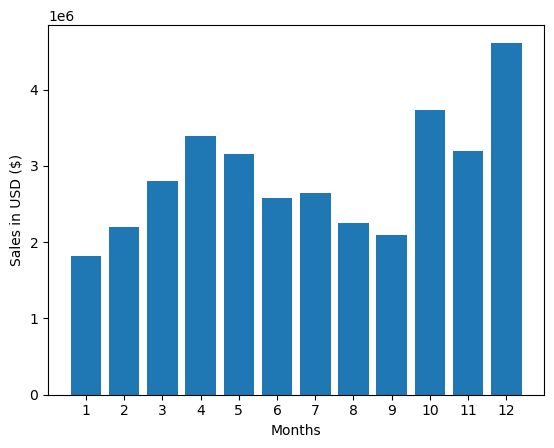

In [19]:
months=range(1,13)

plt.bar(months,results["Sales"])
plt.xticks(months)
plt.ylabel("Sales in USD ($)")
plt.xlabel("Months")
plt.show()

In [ ]:
#Answer:December

# Question 2:What city had the highest number of sales

In [34]:
city_results = all_data.groupby("Cities").sum()
city_results

,Quantity Ordered,Price Each,Month,Sales
Cities,,,,
Atlanta (GA),16602,2779908.20,104794,2795498.58
Austin (TX),11153,1809873.61,69829,1819581.75
Boston (MA),22528,3637409.77,141112,3661642.01
Dallas (TX),16730,2752627.82,104620,2767975.40
Los Angeles (CA),33289,5421435.23,208325,5452570.80
New York City (NY),27932,4635370.83,175741,4664317.43
Portland (ME),2750,447189.25,17144,449758.27
Portland (OR),11303,1860558.22,70621,1870732.34
San Francisco (CA),50239,8211461.74,315520,8262203.91


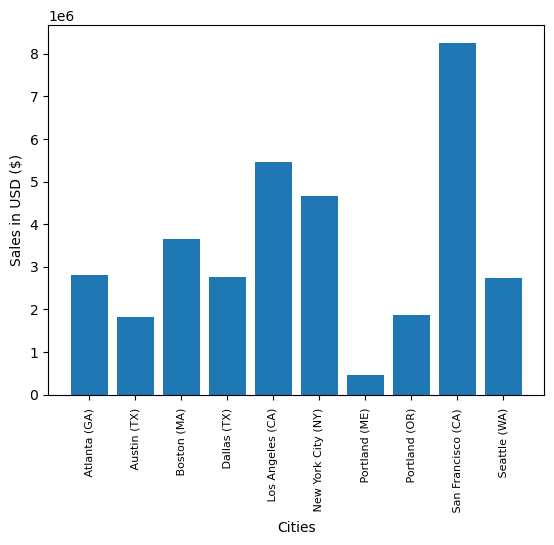

In [38]:
cities=[city for city,df in all_data.groupby("Cities")]

plt.bar(cities,city_results["Sales"])
plt.xticks(cities,rotation="vertical",size=8)
plt.ylabel("Sales in USD ($)")
plt.xlabel("Cities")
plt.show()

In [ ]:
#Answer:San Fransisco (CA)

# Question3:What time should we display advertisements to maximize likelihood of customer's buying product?

In [39]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Cities
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


In [40]:
all_data["Order Date"]=pd.to_datetime(all_data["Order Date"])


In [41]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Cities
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


In [43]:
all_data["Hour"]=all_data["Order Date"].dt.hour
all_data["Minute"]=all_data["Order Date"].dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Cities,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


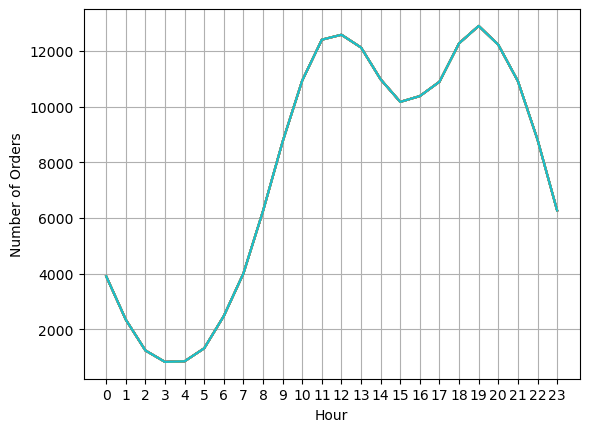

In [47]:
hours=[hour for hour,df in all_data.groupby("Hour")]

plt.plot(hours,all_data.groupby(["Hour"]).count())
plt.xticks(hours)
plt.xlabel("Hour")
plt.ylabel("Number of Orders")
plt.grid()
plt.show()


In [ ]:
#Answer:12am (12) and 7pm (19)

# Question 4:What products are most often sold together

In [48]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Cities,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


In [55]:
df=all_data[all_data['Order ID'].duplicated(keep=False)]
df["Grouped"]=df.groupby("Order ID")["Product"].transform(lambda x :",".join(x))

df=df[["Order ID","Grouped"]].drop_duplicates()

df.head()

,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [58]:
count=Counter()

for row in df['Grouped']:
    row_list=row.split(",")
    count.update(Counter(combinations(row_list,2)))
    
for key,value in count.most_common(10):
    print(key,value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


# Question 5:What product sold the most?Why do you think it sold the most

In [59]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Cities,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


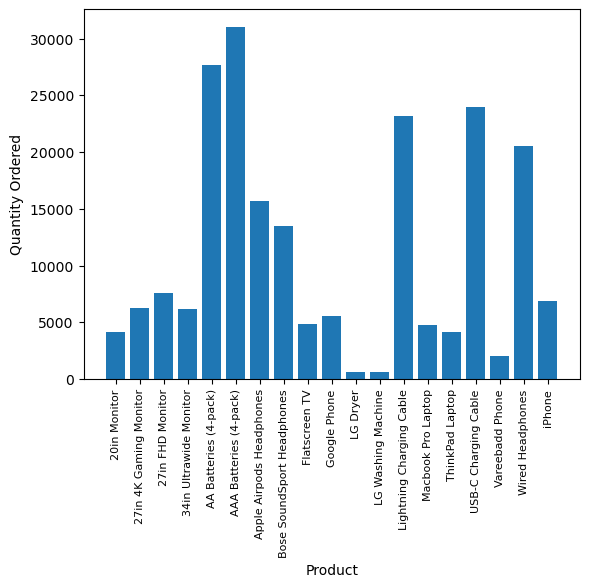

In [63]:
product_group=all_data.groupby("Product")
quantity_ordered=product_group.sum()["Quantity Ordered"]

products=[product for product,df in product_group]

plt.bar(products,quantity_ordered)
plt.xticks(products,rotation="vertical",size=8)
plt.ylabel("Quantity Ordered")
plt.xlabel("Product")
plt.show()

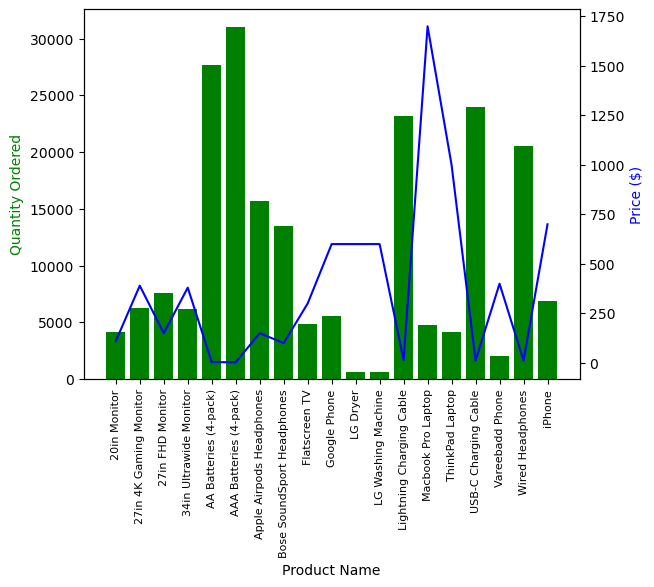

In [69]:
prices=all_data.groupby("Product").mean()["Price Each"]

fig,ax1=plt.subplots()

ax2=ax1.twinx()
ax1.bar(products,quantity_ordered,color="g")
ax2.plot(products,prices,"b-")

ax1.set_xlabel("Product Name")
ax1.set_ylabel("Quantity Ordered",color='g')
ax2.set_ylabel("Price ($)",color="b")
ax1.set_xticklabels(products,rotation="vertical",size=8)

plt.show()

In [ ]:
#Answer:AAA Bateries